Combine Histrogram of Oriented Gradient (feature extraction) and Support Vector Machine (classifier) to detect people on images.
source https://www.pyimagesearch.com/2015/11/09/pedestrian-detection-opencv/

In [3]:
# !pip install opencv-python imutils

In [2]:
# import the necessary packages
from __future__ import print_function
import numpy as np

import cv2

from imutils.object_detection import non_max_suppression
from imutils import paths
import imutils

import matplotlib.pyplot as plt

In [3]:
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [25]:
image_paths = [
    "../data/2013_CrossFit_Games_-_Stadium_relay.jpg",
    "../data/pedestrian.jpg"
]

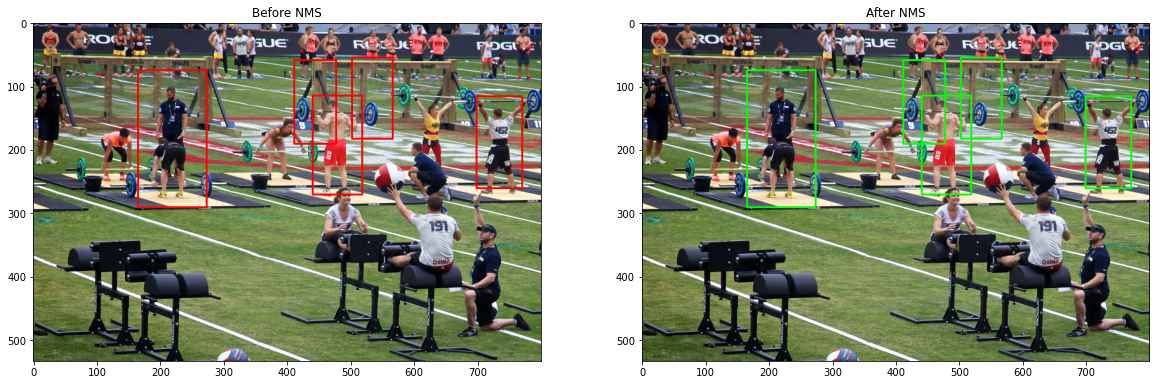

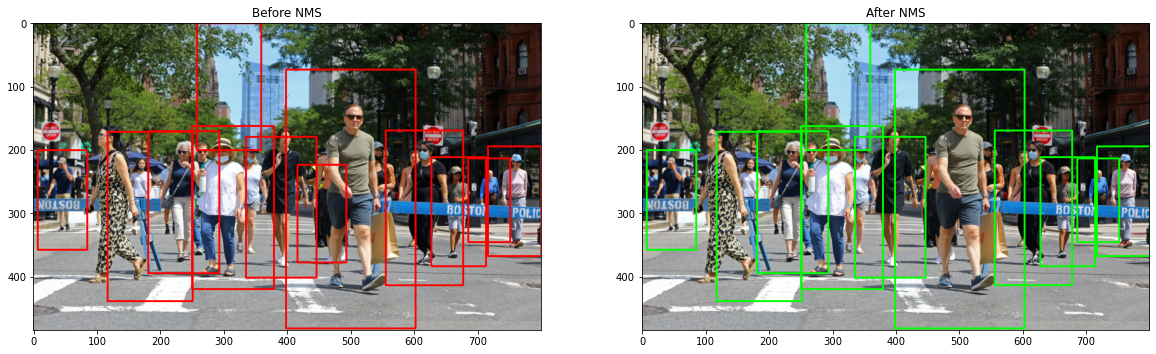

In [26]:
for image_path in image_paths:
    # load the image and resize it to (1) reduce detection time
    # and (2) improve detection accuracy
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=min(800, image.shape[1]))
    orig = image.copy()

    # detect people in the image
    (rects, weights) = hog.detectMultiScale(
        image, 
        winStride=(4, 4),
        padding=(8, 8), 
        scale=1.05)

    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
        
    # plot results
    fig, ax = plt.subplots(1, 2, figsize=(2*10, 110))
    ax[0].imshow(orig[...,[2,1,0]])
    ax[1].imshow(image[...,[2,1,0]])
    ax[0].set_title("Before NMS")
    ax[1].set_title("After NMS")
    plt.show()